In [146]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [147]:
orders = pd.read_csv('./data/Orders.csv',index_col=0)
orders.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
Row.ID,,,,,,,,,,,,,,,,,,,,,
40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [148]:
orders.dtypes

Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping.Cost     float64
Order.Priority     object
dtype: object

array([[<AxesSubplot:title={'center':'Postal.Code'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Shipping.Cost'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

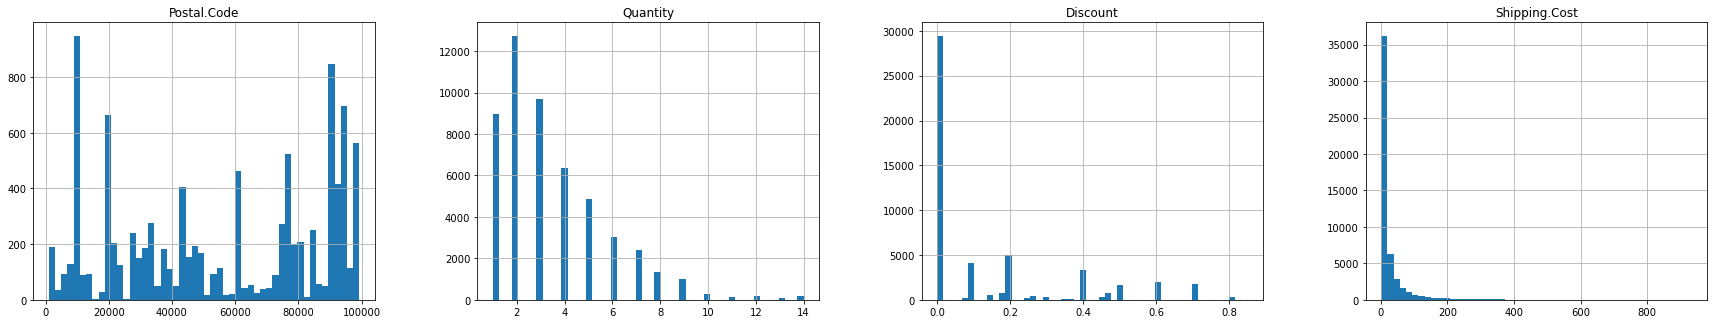

In [149]:
orders.hist(bins = 50, figsize = (30,25), layout = (4,4))

In [150]:
orders.columns

Index(['Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID',
       'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [151]:
orders.describe()

,Postal.Code,Quantity,Discount,Shipping.Cost
count,9994.000000,51290.000000,51290.000000,51290.000000
mean,55190.379428,3.476545,0.142908,26.478567
std,32063.693350,2.278766,0.212280,57.251373
min,1040.000000,1.000000,0.000000,1.002000
25%,23223.000000,2.000000,0.000000,2.610000
50%,56430.500000,3.000000,0.000000,7.790000
75%,90008.000000,5.000000,0.200000,24.450000
max,99301.000000,14.000000,0.850000,933.570000


In [152]:
#finding the missing columns and missing rows
missing_rows = pd.isnull(orders).sum(axis = 1)>0
missing_rows
missing_columns = pd.isnull(orders).sum(axis = 0)>0
missing_columns
# remove missing rows
orders = orders[~missing_rows]

In [153]:
orders[['Profit','Sales']].head()

,Profit,Sales
Row.ID,,
40098,$62.15,$221.98
40099,$54.71,$341.96
36258,$5.48,$48.71
36259,$4.66,$17.94
39519,-$2.52,$12.62


In [154]:
# remove $
orders['Profit'] = orders['Profit'].str.replace('$','')
orders['Sales'] = orders['Sales'].str.replace('$','')
# remove ,
orders['Profit'] = orders['Profit'].str.replace(',','')
orders['Sales'] = orders['Sales'].str.replace(',','')


# convert to float
orders['Profit'] = orders['Profit'].astype(float)
orders['Sales'] = orders['Sales'].astype(float)

In [155]:
orders[['Profit','Sales']].dtypes

Profit    float64
Sales     float64
dtype: object

In [156]:
orders[['Profit','Sales']].head()

,Profit,Sales
Row.ID,,
40098,62.15,221.98
40099,54.71,341.96
36258,5.48,48.71
36259,4.66,17.94
39519,-2.52,12.62


In [157]:
orders.head()
#convert Order.Date to date type
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
# add month column to check invontory per month 
orders['Order.Month'] = orders['Order.Date'].dt.month

In [158]:
# finding the categories of the inventories in the company
orders['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [159]:
technology = orders[orders['Category'] == 'Technology' ]
furniture = orders[orders['Category'] == 'Furniture' ]
office_supplies = orders[orders['Category'] == 'Office Supplies']

In [160]:
# convert Order.Date to datetime type
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])

In [161]:

technology.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month
Row.ID,,,,,,,,,,,,,,,,,,,,,
40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11
40977,CA-2013-AH10030140-41635,2013-12-27,12/31/13,Standard Class,AH-100301404,Aaron Hawkins,Corporate,94122.0,San Francisco,California,...,Technology,Phones,Geemarc AmpliPOWER60,668.16,9,0.2,75.17,45.74,Medium,12
40100,CA-2012-AH10030140-41273,2012-12-30,12/31/12,First Class,AH-100301406,Aaron Hawkins,Corporate,10035.0,New York City,New York,...,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,34.77,3,0.0,11.47,8.22,High,12
32637,CA-2015-AS10045140-42007,2015-01-03,1/5/15,First Class,AS-100451408,Aaron Smayling,Corporate,28540.0,Jacksonville,North Carolina,...,Technology,Machines,Cisco CP-7937G Unified IP Conference Station P...,695.70,2,0.5,-27.83,160.19,High,1
33130,CA-2015-AS10045140-42218,2015-08-02,8/8/15,Standard Class,AS-100451402,Aaron Smayling,Corporate,78745.0,Austin,Texas,...,Technology,Machines,Bady BDG101FRU Card Printer,1439.98,3,0.4,-264.00,103.62,Medium,8


<AxesSubplot:xlabel='Order.Month,Sub.Category'>

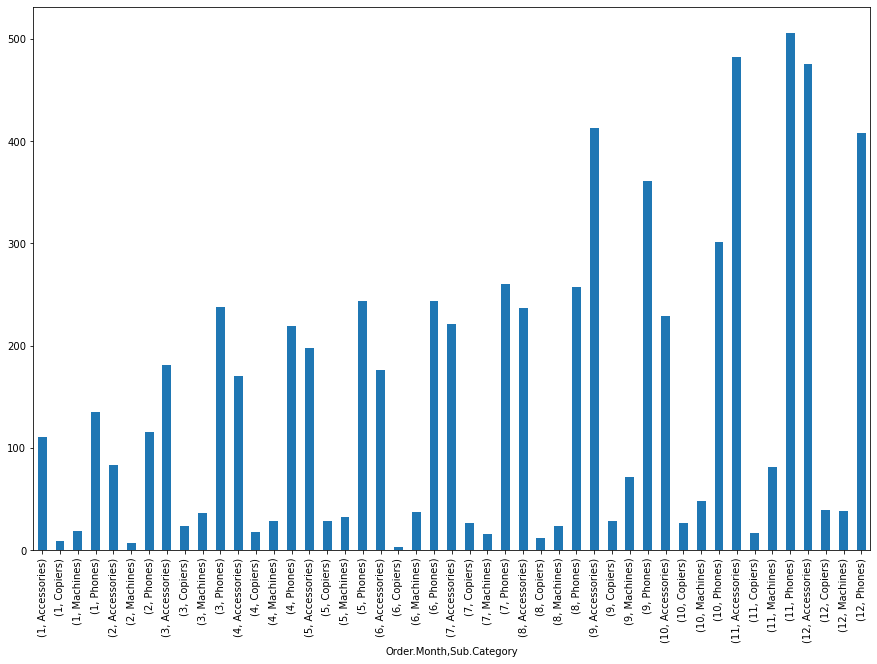

In [162]:
plt.figure(figsize=(15,10))
technology.groupby('Order.Month').agg({'Quantity': ['sum']})
technology.groupby(['Order.Month','Sub.Category'])['Quantity'].sum().plot.bar()

<AxesSubplot:xlabel='Order.Month'>

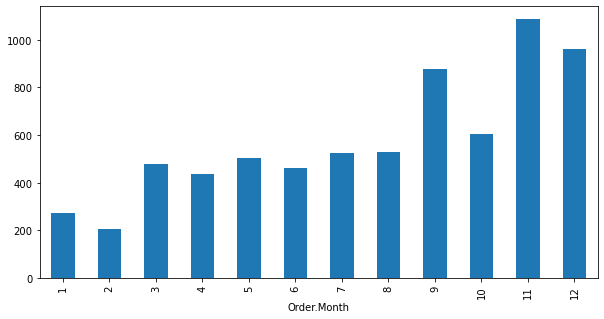

In [163]:
plt.figure(figsize=(10,5))
technology.groupby('Order.Month')['Quantity'].sum().plot.bar()

<AxesSubplot:xlabel='Order.Month,Sub.Category'>

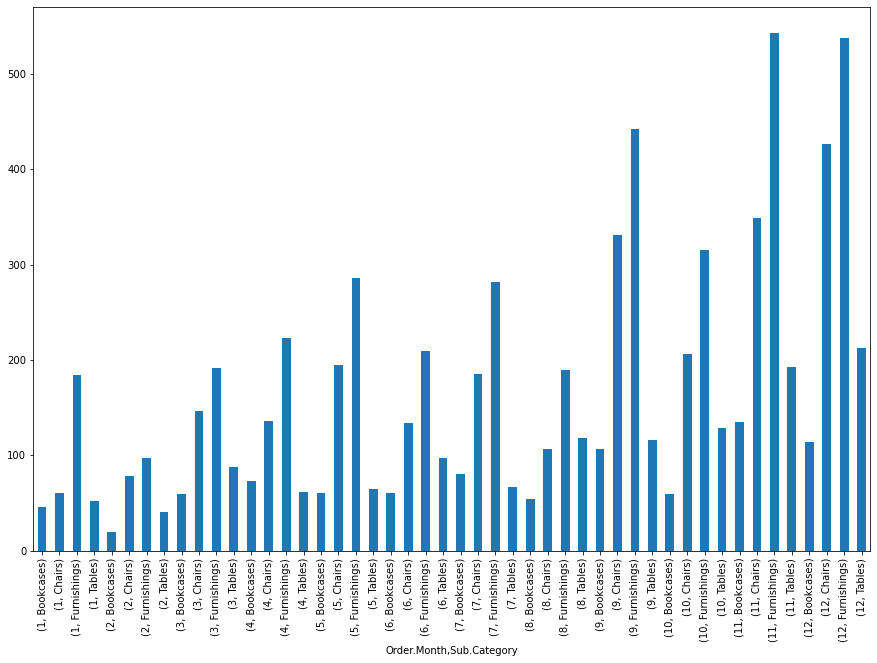

In [164]:
plt.figure(figsize=(15,10))
furniture.groupby('Order.Month').agg({'Quantity': ['sum']})
furniture.groupby(['Order.Month','Sub.Category'])['Quantity'].sum().plot.bar()

<AxesSubplot:xlabel='Order.Month'>

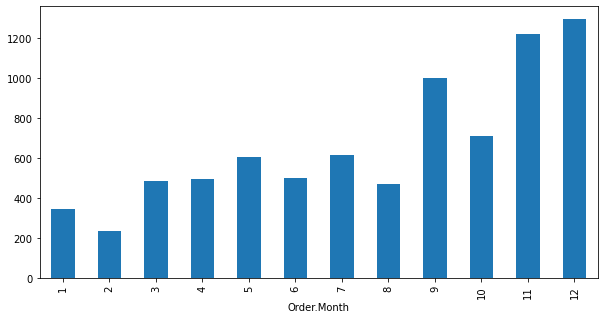

In [165]:
plt.figure(figsize= (10,5))
furniture.groupby('Order.Month')['Quantity'].sum().plot.bar()

In [166]:
office_supplies.head()
office_supplies.groupby('Order.Month').agg({'Quantity': ['sum']})

,Quantity
,sum
Order.Month,
1,883
2,666
3,1498
4,1499
5,1795
6,1641
7,1569
8,1799


<AxesSubplot:xlabel='Order.Month'>

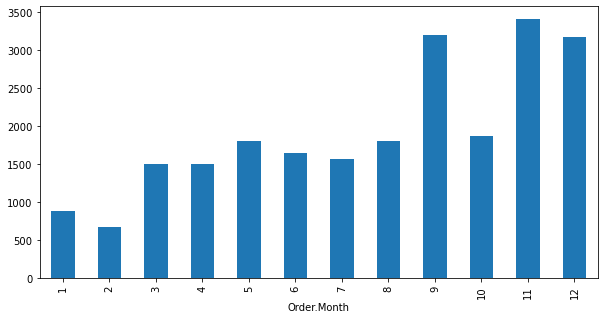

In [167]:
plt.figure(figsize=(10,5))
office_supplies.groupby('Order.Month')['Quantity'].sum().plot.bar()

<AxesSubplot:xlabel='Order.Month,Sub.Category'>

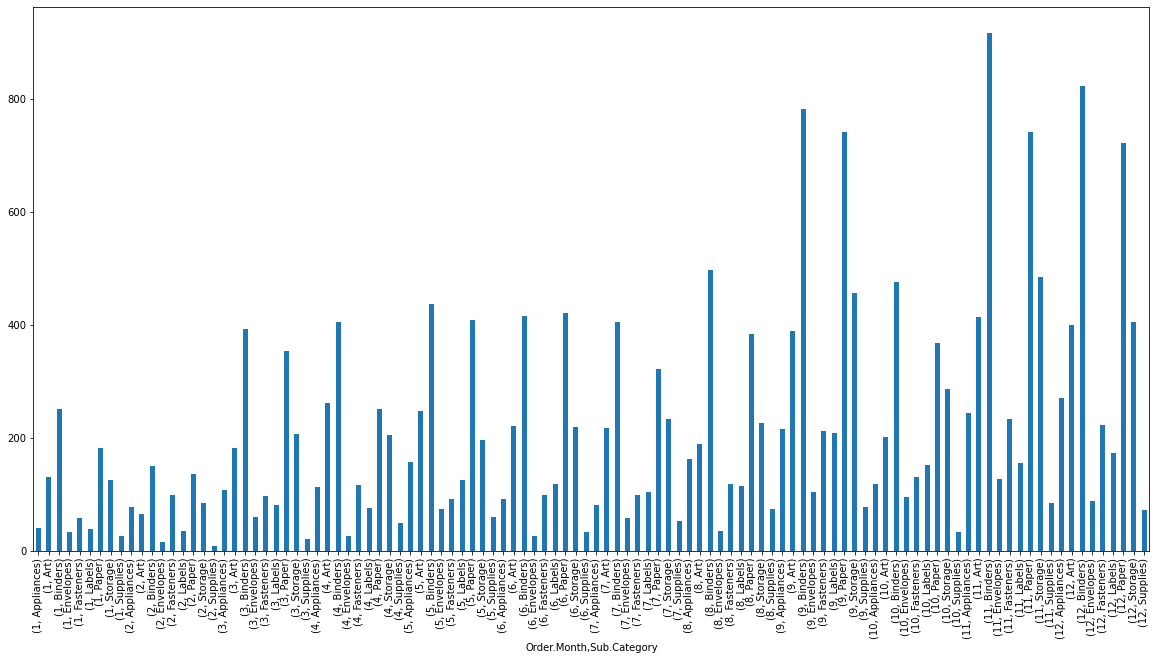

In [168]:
plt.figure(figsize=(20,10))
office_supplies.groupby(['Order.Month','Sub.Category'])['Quantity'].sum().plot.bar()

In [169]:
returns = pd.read_csv('./data/Returns.csv')

In [170]:
returns.head()
returns['Returned'].unique()

array(['Yes'], dtype=object)

In [171]:
orders.columns

Index(['Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID',
       'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority', 'Order.Month'],
      dtype='object')

In [172]:
#drop region col before merging it's already in orders
returns = returns.drop(['Region'],1)
merged = pd.merge(orders,returns, how='left', left_on= 'Order.ID', right_on= 'Order ID')
merged = merged.drop(['Order ID'],1)
merged.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned
0,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,NaN
1,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.96,2,0.0,54.71,25.27,High,11,NaN
2,CA-2012-AB10015140-40974,2012-03-06,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,Chairs,"Global Push Button Manager's Chair, Indigo",48.71,1,0.2,5.48,11.13,High,3,NaN
3,CA-2012-AB10015140-40974,2012-03-06,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,Art,Newell 330,17.94,3,0.0,4.66,4.29,High,3,NaN
4,CA-2012-AB10015140-40958,2012-02-19,2/25/12,Standard Class,AB-100151402,Aaron Bergman,Consumer,76017.0,Arlington,Texas,...,Storage,Akro Stacking Bins,12.62,2,0.2,-2.52,1.97,Low,2,NaN


In [173]:
merged['Returned'].unique()

array([nan, 'Yes'], dtype=object)

In [174]:
merged['Returned'] = merged['Returned'].fillna('No')

In [175]:
merged.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned
0,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,No
1,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.96,2,0.0,54.71,25.27,High,11,No
2,CA-2012-AB10015140-40974,2012-03-06,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,Chairs,"Global Push Button Manager's Chair, Indigo",48.71,1,0.2,5.48,11.13,High,3,No
3,CA-2012-AB10015140-40974,2012-03-06,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,Art,Newell 330,17.94,3,0.0,4.66,4.29,High,3,No
4,CA-2012-AB10015140-40958,2012-02-19,2/25/12,Standard Class,AB-100151402,Aaron Bergman,Consumer,76017.0,Arlington,Texas,...,Storage,Akro Stacking Bins,12.62,2,0.2,-2.52,1.97,Low,2,No


In [176]:
merged['Order.Year'] = merged['Order.Date'].dt.year

In [177]:
merged.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Order.Year
0,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,No,2014
1,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,"Sauder Facets Collection Library, Sky Alder Fi...",341.96,2,0.0,54.71,25.27,High,11,No,2014
2,CA-2012-AB10015140-40974,2012-03-06,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,"Global Push Button Manager's Chair, Indigo",48.71,1,0.2,5.48,11.13,High,3,No,2012
3,CA-2012-AB10015140-40974,2012-03-06,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,Newell 330,17.94,3,0.0,4.66,4.29,High,3,No,2012
4,CA-2012-AB10015140-40958,2012-02-19,2/25/12,Standard Class,AB-100151402,Aaron Bergman,Consumer,76017.0,Arlington,Texas,...,Akro Stacking Bins,12.62,2,0.2,-2.52,1.97,Low,2,No,2012


In [178]:
return_loss = merged[(merged['Returned']=='Yes') & (merged['Profit']<0.0)]
return_loss.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Order.Year
367,CA-2013-AG10495140-41571,2013-10-24,10/30/13,Standard Class,AG-104951402,Andrew Gjertsen,Corporate,77041.0,Houston,Texas,...,KI Conference Tables,347.36,7,0.3,-69.47,28.84,Low,10,Yes,2013
393,CA-2012-AG10525140-41153,2012-09-01,9/6/12,Standard Class,AG-105251402,Andy Gerbode,Corporate,77095.0,Houston,Texas,...,Epson TM-T88V Direct Thermal Printer - Monochr...,559.71,3,0.4,-121.27,44.72,Medium,9,Yes,2012
602,CA-2012-AJ10780140-41212,2012-10-30,11/1/12,Second Class,AJ-107801406,Anthony Jacobs,Corporate,44052.0,Lorain,Ohio,...,Hon 94000 Series Round Tables,1421.66,8,0.4,-734.53,277.66,Critical,10,Yes,2012
703,CA-2015-AG10900140-42126,2015-05-02,5/3/15,First Class,AG-109001408,Arthur Gainer,Consumer,33065.0,Coral Springs,Florida,...,Bush Somerset Collection Bookcase,314.35,3,0.2,-15.72,76.84,High,5,Yes,2015
909,CA-2014-BC11125140-41864,2014-08-13,8/17/14,Standard Class,BC-111251406,Becky Castell,Home Office,10011.0,New York City,New York,...,"Global Geo Office Task Chair, Gray",145.76,2,0.1,-8.10,9.10,High,8,Yes,2014


In [179]:
return_loss.groupby('Order.Year')['Profit'].sum()

Order.Year
2012   -1322.26
2013    -413.63
2014    -812.96
2015   -1297.46
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Order.Year'>

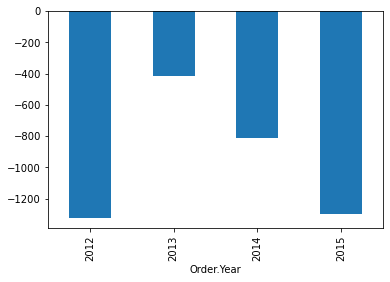

In [180]:
return_loss.groupby('Order.Year')['Profit'].sum().plot.bar()

In [181]:
 customer_returned = merged[merged['Returned']=='Yes'].groupby('Customer.ID').agg({'Returned': ['count']})
customer_returned.columns

MultiIndex([('Returned', 'count')],
           )

In [182]:

(customer_returned['Returned'].values > 1).sum()


113

In [183]:
(customer_returned['Returned'].values > 5).sum()

11

In [184]:
merged['Region'].unique()

array(['Central US', 'Western US', 'Eastern US', 'Southern US'],
      dtype=object)

<AxesSubplot:xlabel='Region'>

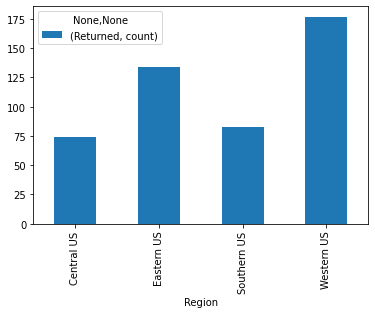

In [185]:
 merged[merged['Returned']=='Yes'].groupby('Region').agg({'Returned': ['count']}).plot.bar()


<AxesSubplot:xlabel='Sub.Category'>

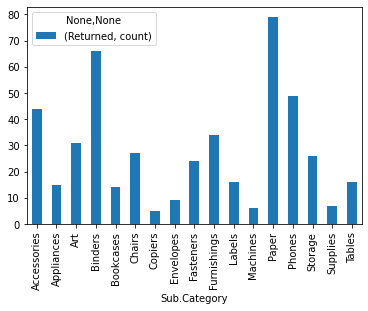

In [186]:
 merged[merged['Returned']=='Yes'].groupby('Sub.Category').agg({'Returned': ['count']}).plot.bar()



<AxesSubplot:xlabel='Category'>

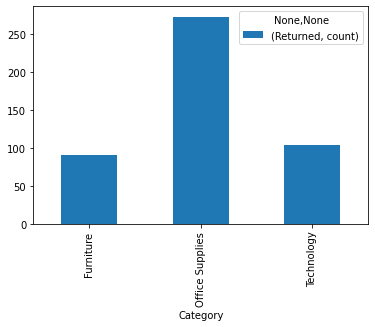

In [187]:
 merged[merged['Returned']=='Yes'].groupby('Category').agg({'Returned': ['count']}).plot.bar()



In [188]:
merged['Returned'].value_counts()

No     9526
Yes     468
Name: Returned, dtype: int64

In [189]:
merged['Ship.Date'] = pd.to_datetime(merged['Ship.Date'])

In [190]:
merged['Process.Time'] = merged['Ship.Date'] - merged['Order.Date']
merged['Process.Time'].value_counts()

4 days    2771
5 days    2175
2 days    1332
6 days    1201
3 days    1007
7 days     621
0 days     519
1 days     368
Name: Process.Time, dtype: int64

In [191]:
product_returned = pd.DataFrame(merged[merged['Returned']=='Yes'].groupby(['Product.ID'])['Returned'].agg('count'))
product_returned.head()
product_returned = product_returned.reset_index()
product_returned.columns = ['Product.ID', 'Returned.Before']
product_returned.head()



,Product.ID,Returned.Before
0,FUR-BO-3176,1
1,FUR-BO-3621,1
2,FUR-BO-3644,1
3,FUR-BO-3645,1
4,FUR-BO-3652,2


In [192]:
merged = pd.merge(merged,product_returned, how= 'left', on = ['Product.ID'])

In [193]:
merged.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Order.Year,Process.Time,Returned.Before
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,2,0.0,62.15,40.77,High,11,No,2014,2 days,NaN
1,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,2,0.0,54.71,25.27,High,11,No,2014,2 days,NaN
2,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,1,0.2,5.48,11.13,High,3,No,2012,1 days,1.0
3,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,3,0.0,4.66,4.29,High,3,No,2012,1 days,NaN
4,CA-2012-AB10015140-40958,2012-02-19,2012-02-25,Standard Class,AB-100151402,Aaron Bergman,Consumer,76017.0,Arlington,Texas,...,2,0.2,-2.52,1.97,Low,2,No,2012,6 days,NaN


In [194]:
merged['Returned.Before'] = merged['Returned.Before'].fillna(0.0).astype(int)
merged.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Order.Year,Process.Time,Returned.Before
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,2,0.0,62.15,40.77,High,11,No,2014,2 days,0
1,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,2,0.0,54.71,25.27,High,11,No,2014,2 days,0
2,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,1,0.2,5.48,11.13,High,3,No,2012,1 days,1
3,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,3,0.0,4.66,4.29,High,3,No,2012,1 days,0
4,CA-2012-AB10015140-40958,2012-02-19,2012-02-25,Standard Class,AB-100151402,Aaron Bergman,Consumer,76017.0,Arlington,Texas,...,2,0.2,-2.52,1.97,Low,2,No,2012,6 days,0


In [195]:
#multiple times the code run so needed to remove extra columns
#merged = merged.drop(['Returned.Before_y'],1)
#merged = merged.drop(['Returned.Before_x'],1)



In [196]:
merged['Market'].value_counts()

USCA    9994
Name: Market, dtype: int64

In [197]:
useful_features = merged.copy()

useful_features = useful_features.drop(['Order.ID'],1)
useful_features = useful_features.drop(['Customer.ID'],1)
useful_features = useful_features.drop(['Product.ID'],1)
useful_features = useful_features.drop(['Customer.Name'],1)
useful_features = useful_features.drop(['Product.Name'],1)
useful_features = useful_features.drop(['Market'],1)

In [198]:
useful_features.head()

,Order.Date,Ship.Date,Ship.Mode,Segment,Postal.Code,City,State,Country,Region,Category,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Order.Year,Process.Time,Returned.Before
0,2014-11-11,2014-11-13,First Class,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,Technology,...,2,0.0,62.15,40.77,High,11,No,2014,2 days,0
1,2014-11-11,2014-11-13,First Class,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,Furniture,...,2,0.0,54.71,25.27,High,11,No,2014,2 days,0
2,2012-03-06,2012-03-07,First Class,Consumer,98103.0,Seattle,Washington,United States,Western US,Furniture,...,1,0.2,5.48,11.13,High,3,No,2012,1 days,1
3,2012-03-06,2012-03-07,First Class,Consumer,98103.0,Seattle,Washington,United States,Western US,Office Supplies,...,3,0.0,4.66,4.29,High,3,No,2012,1 days,0
4,2012-02-19,2012-02-25,Standard Class,Consumer,76017.0,Arlington,Texas,United States,Central US,Office Supplies,...,2,0.2,-2.52,1.97,Low,2,No,2012,6 days,0


In [199]:
useful_features.dtypes

Order.Date          datetime64[ns]
Ship.Date           datetime64[ns]
Ship.Mode                   object
Segment                     object
Postal.Code                float64
City                        object
State                       object
Country                     object
Region                      object
Category                    object
Sub.Category                object
Sales                      float64
Quantity                     int64
Discount                   float64
Profit                     float64
Shipping.Cost              float64
Order.Priority              object
Order.Month                  int64
Returned                    object
Order.Year                   int64
Process.Time       timedelta64[ns]
Returned.Before              int64
dtype: object

In [200]:
useful_features['Ship.Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship.Mode, dtype: int64

In [201]:
useful_features['Ship.Mode'] = useful_features['Ship.Mode'].astype('category')

In [202]:
useful_features['Ship.Mode'] = useful_features['Ship.Mode'].cat.codes

In [203]:
useful_features['Ship.Mode'].value_counts()

3    5968
2    1945
0    1538
1     543
Name: Ship.Mode, dtype: int64

In [204]:
useful_features.head()

,Order.Date,Ship.Date,Ship.Mode,Segment,Postal.Code,City,State,Country,Region,Category,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Order.Year,Process.Time,Returned.Before
0,2014-11-11,2014-11-13,0,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,Technology,...,2,0.0,62.15,40.77,High,11,No,2014,2 days,0
1,2014-11-11,2014-11-13,0,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,Furniture,...,2,0.0,54.71,25.27,High,11,No,2014,2 days,0
2,2012-03-06,2012-03-07,0,Consumer,98103.0,Seattle,Washington,United States,Western US,Furniture,...,1,0.2,5.48,11.13,High,3,No,2012,1 days,1
3,2012-03-06,2012-03-07,0,Consumer,98103.0,Seattle,Washington,United States,Western US,Office Supplies,...,3,0.0,4.66,4.29,High,3,No,2012,1 days,0
4,2012-02-19,2012-02-25,3,Consumer,76017.0,Arlington,Texas,United States,Central US,Office Supplies,...,2,0.2,-2.52,1.97,Low,2,No,2012,6 days,0


In [205]:
useful_features['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [206]:
useful_features['Segment'] = useful_features['Segment'].astype('category')
useful_features['Segment'] = useful_features['Segment'].cat.codes

In [207]:
useful_features['Segment'].value_counts()

0    5191
1    3020
2    1783
Name: Segment, dtype: int64

In [208]:
useful_features.head()

,Order.Date,Ship.Date,Ship.Mode,Segment,Postal.Code,City,State,Country,Region,Category,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Order.Year,Process.Time,Returned.Before
0,2014-11-11,2014-11-13,0,0,73120.0,Oklahoma City,Oklahoma,United States,Central US,Technology,...,2,0.0,62.15,40.77,High,11,No,2014,2 days,0
1,2014-11-11,2014-11-13,0,0,73120.0,Oklahoma City,Oklahoma,United States,Central US,Furniture,...,2,0.0,54.71,25.27,High,11,No,2014,2 days,0
2,2012-03-06,2012-03-07,0,0,98103.0,Seattle,Washington,United States,Western US,Furniture,...,1,0.2,5.48,11.13,High,3,No,2012,1 days,1
3,2012-03-06,2012-03-07,0,0,98103.0,Seattle,Washington,United States,Western US,Office Supplies,...,3,0.0,4.66,4.29,High,3,No,2012,1 days,0
4,2012-02-19,2012-02-25,3,0,76017.0,Arlington,Texas,United States,Central US,Office Supplies,...,2,0.2,-2.52,1.97,Low,2,No,2012,6 days,0


In [209]:
useful_features['Category'].value_counts()

Office Supplies    6042
Furniture          2105
Technology         1847
Name: Category, dtype: int64

In [210]:
useful_features['Category'] = useful_features['Category'].astype('category')
useful_features['Category'] = useful_features['Category'].cat.codes

In [211]:
useful_features['Category'].value_counts()

1    6042
0    2105
2    1847
Name: Category, dtype: int64

In [212]:
useful_features['Sub.Category'].value_counts()

Binders        1517
Paper          1324
Furnishings     941
Phones          889
Storage         836
Art             777
Accessories     775
Chairs          617
Appliances      453
Fasteners       398
Labels          359
Tables          319
Bookcases       228
Envelopes       206
Supplies        172
Machines        115
Copiers          68
Name: Sub.Category, dtype: int64

In [213]:
useful_features['Sub.Category'] = useful_features['Sub.Category'].astype('category')
useful_features['Sub.Category'] = useful_features['Sub.Category'].cat.codes

In [214]:
useful_features['Sub.Category'].value_counts()

3     1517
12    1324
9      941
13     889
14     836
2      777
0      775
5      617
1      453
8      398
10     359
16     319
4      228
7      206
15     172
11     115
6       68
Name: Sub.Category, dtype: int64

In [215]:
useful_features['Region'].value_counts()

Western US     3203
Eastern US     2848
Central US     2323
Southern US    1620
Name: Region, dtype: int64

In [216]:
useful_features['Region'] = useful_features['Region'].astype('category')
useful_features['Region'] = useful_features['Region'].cat.codes

In [217]:
useful_features['Region'].value_counts()

3    3203
1    2848
0    2323
2    1620
Name: Region, dtype: int64

In [218]:
useful_features['Returned'].value_counts()

No     9526
Yes     468
Name: Returned, dtype: int64

In [219]:
useful_features['Returned'] = useful_features['Returned'].astype('category')
useful_features['Returned'] = useful_features['Returned'].cat.codes

In [220]:
useful_features['Returned'].value_counts()

0    9526
1     468
Name: Returned, dtype: int64

In [221]:
import category_encoders as ce
useful_features['Order.Priority'].value_counts()

Medium      5710
High        3069
Critical     783
Low          432
Name: Order.Priority, dtype: int64

In [222]:
useful_features['Order.Priority'] = useful_features['Order.Priority'].astype('category')
useful_features['Order.Priority'] = useful_features['Order.Priority'].cat.codes


In [223]:
useful_features['Order.Priority'].value_counts()

3    5710
1    3069
0     783
2     432
Name: Order.Priority, dtype: int64

In [224]:
useful_features.head()

,Order.Date,Ship.Date,Ship.Mode,Segment,Postal.Code,City,State,Country,Region,Category,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Order.Year,Process.Time,Returned.Before
0,2014-11-11,2014-11-13,0,0,73120.0,Oklahoma City,Oklahoma,United States,0,2,...,2,0.0,62.15,40.77,1,11,0,2014,2 days,0
1,2014-11-11,2014-11-13,0,0,73120.0,Oklahoma City,Oklahoma,United States,0,0,...,2,0.0,54.71,25.27,1,11,0,2014,2 days,0
2,2012-03-06,2012-03-07,0,0,98103.0,Seattle,Washington,United States,3,0,...,1,0.2,5.48,11.13,1,3,0,2012,1 days,1
3,2012-03-06,2012-03-07,0,0,98103.0,Seattle,Washington,United States,3,1,...,3,0.0,4.66,4.29,1,3,0,2012,1 days,0
4,2012-02-19,2012-02-25,3,0,76017.0,Arlington,Texas,United States,0,1,...,2,0.2,-2.52,1.97,2,2,0,2012,6 days,0


In [225]:
useful_features['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [226]:
useful_features['State'] = useful_features['State'].astype('category')
useful_features['State'] = useful_features['State'].cat.codes



In [227]:
useful_features['State'].value_counts()

3     2001
30    1128
41     985
36     587
45     506
11     492
33     469
8      383
20     255
31     249
1      224
44     224
9      184
40     183
4      182
12     149
15     139
19     135
28     130
35     124
47     110
18     105
6       96
21      89
5       82
23      66
34      66
0       61
2       60
37      56
22      53
42      53
16      42
38      42
26      39
25      38
29      37
13      30
27      27
14      24
10      21
24      15
39      12
43      11
7       10
17       8
32       7
46       4
48       1
Name: State, dtype: int64

In [228]:
useful_features['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [229]:
useful_features = useful_features.drop(['Country'],1)


In [230]:
useful_features['Process.Time'] = useful_features['Process.Time'].astype('timedelta64[D]').astype(int)

In [231]:
useful_features.head()

,Order.Date,Ship.Date,Ship.Mode,Segment,Postal.Code,City,State,Region,Category,Sub.Category,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Order.Year,Process.Time,Returned.Before
0,2014-11-11,2014-11-13,0,0,73120.0,Oklahoma City,34,0,2,13,...,2,0.0,62.15,40.77,1,11,0,2014,2,0
1,2014-11-11,2014-11-13,0,0,73120.0,Oklahoma City,34,0,0,4,...,2,0.0,54.71,25.27,1,11,0,2014,2,0
2,2012-03-06,2012-03-07,0,0,98103.0,Seattle,45,3,0,5,...,1,0.2,5.48,11.13,1,3,0,2012,1,1
3,2012-03-06,2012-03-07,0,0,98103.0,Seattle,45,3,1,2,...,3,0.0,4.66,4.29,1,3,0,2012,1,0
4,2012-02-19,2012-02-25,3,0,76017.0,Arlington,41,0,1,14,...,2,0.2,-2.52,1.97,2,2,0,2012,6,0


In [232]:
useful_features['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Commerce City      1
Bartlett           1
Abilene            1
Lake Elsinore      1
Hagerstown         1
Name: City, Length: 531, dtype: int64

In [233]:
useful_features['City'] = useful_features['City'].astype('category')
useful_features['City'] = useful_features['City'].cat.codes



In [234]:
useful_features['City'].value_counts()

329    915
266    747
374    537
438    510
452    428
      ... 
309      1
496      1
349      1
1        1
0        1
Name: City, Length: 531, dtype: int64

In [235]:
useful_features.head()

,Order.Date,Ship.Date,Ship.Mode,Segment,Postal.Code,City,State,Region,Category,Sub.Category,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Order.Year,Process.Time,Returned.Before
0,2014-11-11,2014-11-13,0,0,73120.0,345,34,0,2,13,...,2,0.0,62.15,40.77,1,11,0,2014,2,0
1,2014-11-11,2014-11-13,0,0,73120.0,345,34,0,0,4,...,2,0.0,54.71,25.27,1,11,0,2014,2,0
2,2012-03-06,2012-03-07,0,0,98103.0,452,45,3,0,5,...,1,0.2,5.48,11.13,1,3,0,2012,1,1
3,2012-03-06,2012-03-07,0,0,98103.0,452,45,3,1,2,...,3,0.0,4.66,4.29,1,3,0,2012,1,0
4,2012-02-19,2012-02-25,3,0,76017.0,16,41,0,1,14,...,2,0.2,-2.52,1.97,2,2,0,2012,6,0


In [236]:
useful_features.dtypes



Order.Date         datetime64[ns]
Ship.Date          datetime64[ns]
Ship.Mode                    int8
Segment                      int8
Postal.Code               float64
City                        int16
State                        int8
Region                       int8
Category                     int8
Sub.Category                 int8
Sales                     float64
Quantity                    int64
Discount                  float64
Profit                    float64
Shipping.Cost             float64
Order.Priority               int8
Order.Month                 int64
Returned                     int8
Order.Year                  int64
Process.Time                int64
Returned.Before             int64
dtype: object

In [237]:
final_features = useful_features.copy()

In [238]:
final_features = final_features.drop(['Order.Date'],1)
final_features = final_features.drop(['Ship.Date'],1)



In [239]:
final_features.head()

,Ship.Mode,Segment,Postal.Code,City,State,Region,Category,Sub.Category,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Order.Year,Process.Time,Returned.Before
0,0,0,73120.0,345,34,0,2,13,221.98,2,0.0,62.15,40.77,1,11,0,2014,2,0
1,0,0,73120.0,345,34,0,0,4,341.96,2,0.0,54.71,25.27,1,11,0,2014,2,0
2,0,0,98103.0,452,45,3,0,5,48.71,1,0.2,5.48,11.13,1,3,0,2012,1,1
3,0,0,98103.0,452,45,3,1,2,17.94,3,0.0,4.66,4.29,1,3,0,2012,1,0
4,3,0,76017.0,16,41,0,1,14,12.62,2,0.2,-2.52,1.97,2,2,0,2012,6,0


In [240]:
final_features.dtypes

Ship.Mode             int8
Segment               int8
Postal.Code        float64
City                 int16
State                 int8
Region                int8
Category              int8
Sub.Category          int8
Sales              float64
Quantity             int64
Discount           float64
Profit             float64
Shipping.Cost      float64
Order.Priority        int8
Order.Month          int64
Returned              int8
Order.Year           int64
Process.Time         int64
Returned.Before      int64
dtype: object

In [241]:
from sklearn.model_selection import cross_val_predict , cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression

In [242]:
X = final_features.copy()

In [243]:
X = X.drop(['Returned'],1)
X.head()

,Ship.Mode,Segment,Postal.Code,City,State,Region,Category,Sub.Category,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year,Process.Time,Returned.Before
0,0,0,73120.0,345,34,0,2,13,221.98,2,0.0,62.15,40.77,1,11,2014,2,0
1,0,0,73120.0,345,34,0,0,4,341.96,2,0.0,54.71,25.27,1,11,2014,2,0
2,0,0,98103.0,452,45,3,0,5,48.71,1,0.2,5.48,11.13,1,3,2012,1,1
3,0,0,98103.0,452,45,3,1,2,17.94,3,0.0,4.66,4.29,1,3,2012,1,0
4,3,0,76017.0,16,41,0,1,14,12.62,2,0.2,-2.52,1.97,2,2,2012,6,0


In [244]:
y = final_features['Returned'].values.reshape(-1,1)
y.shape

(9994, 1)

In [245]:
X.shape

(9994, 18)

In [246]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [247]:
X_train

,Ship.Mode,Segment,Postal.Code,City,State,Region,Category,Sub.Category,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year,Process.Time,Returned.Before
4100,1,0,79109.0,8,41,0,1,8,28.35,1,0.2,9.57,4.59,1,10,2014,0,12
2586,3,1,10009.0,329,30,1,1,12,279.90,5,0.0,137.15,18.52,3,12,2015,6,1
9194,2,1,10009.0,329,30,1,1,1,13.11,3,0.0,3.41,1.25,3,3,2013,2,1
2002,3,1,10009.0,329,30,1,1,2,6.99,3,0.0,2.03,1.15,3,4,2014,5,0
7225,3,0,8701.0,240,28,1,1,8,17.90,5,0.0,8.77,1.80,1,10,2015,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,3,0,60068.0,361,11,0,1,12,143.86,9,0.2,48.55,22.10,2,12,2015,7,2
5191,3,1,2151.0,405,19,1,1,3,6.24,2,0.0,3.06,1.34,3,3,2012,5,0
5390,0,1,27405.0,178,31,2,2,13,1359.96,5,0.2,119.00,99.05,3,11,2015,1,1
860,0,0,21215.0,28,18,1,1,12,94.85,5,0.0,45.53,3.50,3,9,2015,3,1


In [248]:
lm = LinearRegression()

In [249]:
lm= lm.fit(X_train, y_train)

In [250]:
lm.score(X_train, y_train)

0.017348746047163743

In [251]:
lm.score(X_test,y_test)

0.020182241070689

In [252]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit = logit.fit(X_train, y_train)


In [253]:
logit.score(X_train,y_train)

0.9529706066291432

In [254]:
logit.score(X_test,y_test)

0.9539769884942472

In [255]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [256]:
tree = tree.fit(X_train,y_train)
tree = tree.fit(X_test,y_test)

In [257]:
tree.score(X_train,y_train)

0.9293308317698562

In [258]:
tree.score(X_test,y_test)

1.0

In [259]:
tree.feature_importances_

array([0.02714888, 0.03706565, 0.07969308, 0.07373351, 0.04576652,
       0.01329294, 0.029011  , 0.03674503, 0.03577547, 0.02233678,
       0.01338177, 0.08170372, 0.13109168, 0.01907552, 0.08239693,
       0.07311053, 0.06572961, 0.13294138])

In [260]:
df_feature_importance = pd.DataFrame(tree.feature_importances_ ,index=X.columns,columns=['feature_importance']).sort_values('feature_importance', ascending=False)

<AxesSubplot:>

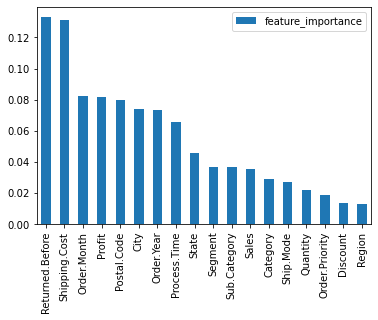

In [261]:
df_feature_importance.plot(kind='bar')